In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cross_validation import train_test_split
import random

/Users/marksonzhang/Library/Python/3.6/lib/python/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_df = pd.read_csv('datatraining.txt')

train = train_df.drop(['date'],axis=1)

label = train_df['Occupancy']
train = train.drop(['Occupancy'],axis=1)

x_train, x_test,y_train,y_test = train_test_split(train, label.values.reshape(-1, 1) ,random_state = 42)

# One hot coded
y_train = tf.concat([1 - y_train, y_train],axis=1)
y_test = tf.concat([1 - y_test, y_test],axis=1)

In [7]:
# 设置模型
learning_rate = 0.001
training_epochs = 20
batch_size = 100
display_step = 1

In [8]:
n_samples = x_train.shape[0]
n_features = 5
n_class = 2
x = tf.placeholder(tf.float32, [None, n_features])
y = tf.placeholder(tf.float32, [None, n_class])

In [9]:
W = tf.Variable(tf.zeros([n_features, n_class]))
b = tf.Variable(tf.zeros([n_class]))

In [10]:
pred = tf.matmul(x, W) + b

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0001 cost= 0.4020115273897765
Epoch: 0002 cost= 0.3841859160876665
Epoch: 0003 cost= 0.174329616984383
Epoch: 0004 cost= 0.1143276026991547
Epoch: 0005 cost= 0.1171866479467173
Epoch: 0006 cost= 0.139226460065998
Epoch: 0007 cost= 0.2271726170524222
Epoch: 0008 cost= 0.1280033392984359
Epoch: 0009 cost= 0.10287417740118308
Epoch: 0010 cost= 0.05597935739110728
Epoch: 0011 cost= 0.07625366429813572
Epoch: 0012 cost= 0.06677909757270188
Epoch: 0013 cost= 0.048221525598744874
Epoch: 0014 cost= 0.11155011223965004
Epoch: 0015 cost= 0.08675251632440285
Epoch: 0016 cost= 0.0572466537600658
Epoch: 0017 cost= 0.08121372441776463
Epoch: 0018 cost= 0.03486135357716044
Epoch: 0019 cost= 0.055104775506942
Epoch: 0020 cost= 0.0485081

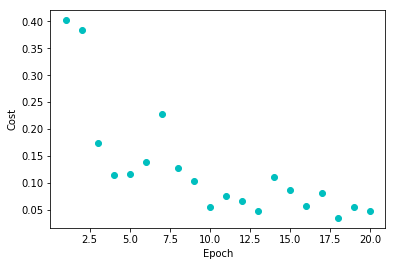

In [11]:
# 损失函数
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

# 梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 准确率
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 初始化所有变量
init = tf.initialize_all_variables()

# 训练模型
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(n_samples / batch_size)
        for i in range(total_batch):
            _, c = sess.run([optimizer, cost], 
                            feed_dict={x: x_train[i * batch_size : (i+1) * batch_size], 
                                      y: y_train[i * batch_size : (i+1) * batch_size, :].eval()})
            avg_cost = c / total_batch
        plt.plot(epoch+1, avg_cost, 'co')

        if (epoch+1) % display_step == 0:
            print("Epoch:", "%04d" % (epoch+1), "cost=", avg_cost)

    print("Optimization Finished!")

    print("Testing Accuracy:", accuracy.eval({x: x_train, y:y_train.eval()}))
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.show()